# Seaborn

Source:  [https://github.com/d-insight/code-bank.git](https://github.com/d-insight/code-bank.git)  
License: [MIT License](https://opensource.org/licenses/MIT). See open source [license](LICENSE) in the Code Bank repository. 

---

## Introduction

Seaborn, is a powerful but easy-to-use data visualization tool! 

Some examples of charts:

![tut1_plots_you_make](https://i.imgur.com/54BoIBW.png)

## Set up the notebook

There are a few lines of code that you'll need to run at the top of every notebook to set up your coding environment.  It's not important to understand these lines of code now, and so we won't go into the details just yet.  (_Notice that it returns as output: `Setup Complete`._)

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Load the data

In this notebook, we'll work with a dataset of historical FIFA rankings and look at six countries: Argentina (ARG), Brazil (BRA), Spain (ESP), France (FRA), Germany (GER), and Italy (ITA).  The dataset is stored as a CSV file.

To load the data into the notebook, we'll use two distinct steps, implemented in the code cell below as follows:
- begin by specifying the location (or filepath) where the dataset can be accessed
- use the filepath to load the contents of the dataset into a Pandas datarframe

In [3]:
# Path of the file to read
fifa_filepath = "data/fifa_ranking.csv"

# Read the file into a variable fifa_data
fifa_data = pd.read_csv(fifa_filepath, parse_dates=True)

In [4]:
# Let's look at the file
fifa_data.head()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43948,1,Germany,GER,57,0,0,UEFA,1992-12-31
1,43873,107,Mozambique,MOZ,9,0,0,CAF,1992-12-31
2,43816,108,Indonesia,IDN,9,0,0,AFC,1992-12-31
3,1882218,109,Antigua and Barbuda,ATG,8,0,0,CONCACAF,1992-12-31
4,43820,110,Jordan,JOR,8,0,0,AFC,1992-12-31


In [5]:
# Let's keep only necessary variables
countries = ['ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA']
cols = ['rank', 'country_full', 'rank_date']

In [6]:
fifa = fifa_data[fifa_data['country_abrv'].isin(countries)][cols]

In [7]:
fifa

,rank,country_full,rank_date
0,1,Germany,1992-12-31
103,19,France,1992-12-31
105,3,Brazil,1992-12-31
112,10,Argentina,1992-12-31
117,15,Spain,1992-12-31
...,...,...,...
62135,2,France,2020-11-26
62138,6,Spain,2020-11-26
62139,7,Argentina,2020-11-26
62142,10,Italy,2020-11-26


## Transform the data

We need an appropriate format.

In [7]:
# set rank date as index
fifa.set_index('rank_date', inplace=True)

In [8]:
# from long to wide format
# Check-out this reference for pivoting: https://chrisalbon.com/python/data_wrangling/pandas_long_to_wide/
fifa_pivot = fifa.pivot(columns='country_full', values='rank')

In [9]:
fifa_pivot.to_pickle('fifa_cl')

## Plot the data

In one line of code!

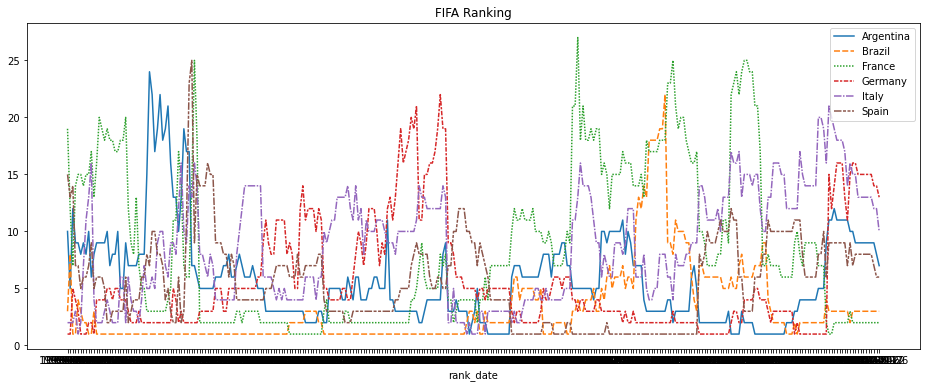

In [52]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Add title
plt.title("FIFA Ranking")

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=fifa_pivot)


## Plot a subset of the data

In [53]:
list(fifa_pivot.columns)

['Argentina', 'Brazil', 'France', 'Germany', 'Italy', 'Spain']

In the next code cell, we plot the lines corresponding to the first two columns in the dataset.

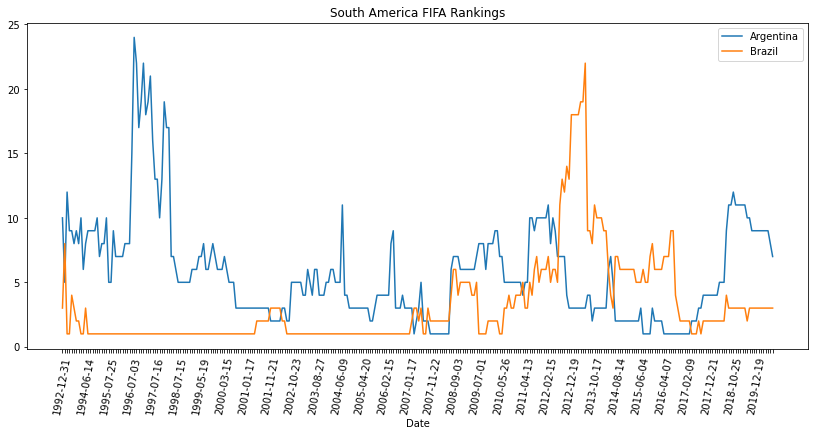

In [74]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))
# Rotate X labels
plt.xticks(rotation=80)

# Add title
plt.title("South America FIFA Rankings")

# Add label for horizontal axis
plt.xlabel("Date")

# Line chart showing Argentina ranking overtime
plotARG = sns.lineplot(data=fifa_pivot['Argentina'], label="Argentina")

# Line chart showing Brazil ranking overtime
plotBRA = sns.lineplot(data=fifa_pivot['Brazil'], label="Brazil")


# Make X labels readable
for ind, label in enumerate(plotARG.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

